<a href="https://colab.research.google.com/github/Reetabisht/Image_classification_by_using_CNN/blob/main/CNN_DOG_CAT__final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dog or Cat classification by using CNN Model:**

In this file we try to Build a Deep Learning model which will perform the Image classification on Dog and cat class. Used a Kaggle Dataset of total 25000 images of Dog and Cat.

In [1]:
# Prior steps to follow to use  Kaggle Dataset Directly without downloading them into our local system.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# Way to read the Kaggle dataset Directly by using API
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:30<00:00, 33.3MB/s]
100% 1.06G/1.06G [00:30<00:00, 37.0MB/s]


In [3]:
# Since our Dataset has been downloaded in zip format so our next aim is to unzip the file
import zipfile
#zip_ref = zipfile.Zipfile('/content/dogs-vs-cats.zip','r')
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
# Import Importent Libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [5]:
# Generator : Divide Largedataset into Small Batches.
# Now Dividing Dataset into train and validation datasets

train_ds= keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


val_ds= keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


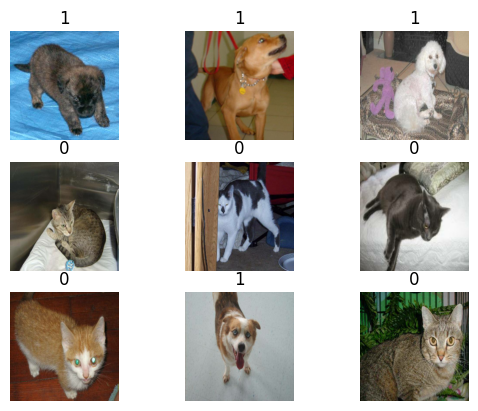

In [6]:
# Visualizing the Dataset with it's Label
import matplotlib.pyplot as plt
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy()/255.0)
        plt.title(str(labels[i].numpy()))
        plt.axis("off")

# here we can se cat is labled as 0 and dog labeled as 1

In [7]:
# Since these 250000 file are store in numpy array format with items range between 0-255
# And We want array's items value between 0-1 otherway we want to perform Normalization
# So we are defining a function which is taking image and label as input and performing Noramilzation task


def norm_func(image,label):
  image = tf.cast(image/255., tf.float32)
  return image,label

norm_train = train_ds.map(norm_func)
norm_val = val_ds.map(norm_func)

# Now all Pixel values of image is between 0-1

In [ ]:
norm_train

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Creating CNN Model

model = Sequential()

# 1st Layer
model.add(Conv2D(32,kernel_size = (3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


# 2nd Layer
model.add(Conv2D(64,kernel_size = (3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# 3rd Layer
model.add(Conv2D(128,kernel_size = (3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Flatten Layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# Details about Model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
# Compiling the Model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# loss is binary_crossentropy because we are soing binary classification

In [ ]:
# Fitting the Model to the Dataset

history = model.fit(norm_train,epochs=10,validation_data=norm_val)

Epoch 1/10
625/625 [==============================] - 58s 81ms/step - loss: 0.6491 - accuracy: 0.6219 - val_loss: 0.6110 - val_accuracy: 0.6548
Epoch 2/10
625/625 [==============================] - 53s 85ms/step - loss: 0.5075 - accuracy: 0.7543 - val_loss: 0.5006 - val_accuracy: 0.7604
Epoch 3/10
625/625 [==============================] - 52s 82ms/step - loss: 0.3859 - accuracy: 0.8260 - val_loss: 0.6492 - val_accuracy: 0.7548
Epoch 4/10
625/625 [==============================] - 50s 80ms/step - loss: 0.2474 - accuracy: 0.8971 - val_loss: 0.6954 - val_accuracy: 0.7832
Epoch 5/10
625/625 [==============================] - 50s 80ms/step - loss: 0.1345 - accuracy: 0.9485 - val_loss: 0.9442 - val_accuracy: 0.7724
Epoch 6/10
625/625 [==============================] - 49s 78ms/step - loss: 0.0782 - accuracy: 0.9705 - val_loss: 1.3329 - val_accuracy: 0.7688
Epoch 7/10
625/625 [==============================] - 51s 82ms/step - loss: 0.0561 - accuracy: 0.9803 - val_loss: 1.1852 - val_accuracy:

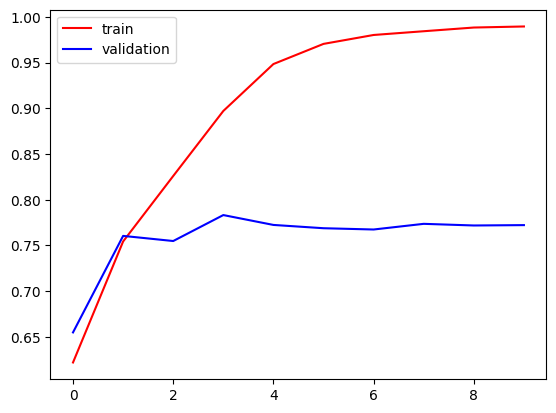

In [ ]:
# Visualization of the train and validation data based on accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


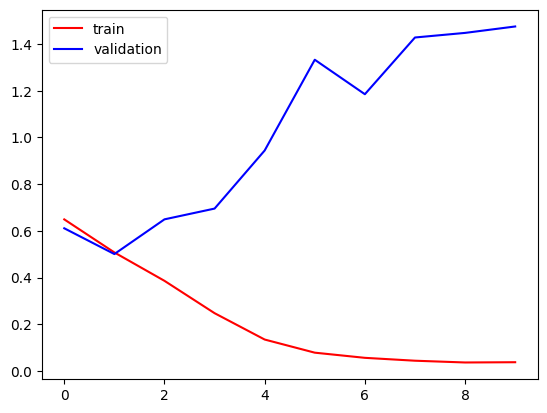

In [ ]:
# Visualization of the train and validation data based on loss

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

As we can see by above graphs that there is a gap between train accuracy and validation accuracy as well as train loss and validation loss which implies the presence of Overfitting  

In [ ]:
# Remedies for Overfitting :


# Data Augmentation
# L1/L2 Regularization
# Dropout
# Batch Norm

**Applying Dropout and BatchNormalization**

In [ ]:
# Create CNN Model with Dropout and BatchNormalization remedies

model1 = Sequential()

model1.add(Conv2D(32,kernel_size = (3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(64,kernel_size = (3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(128,kernel_size = (3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Flatten())

model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.1)) # Dropping 10% of the data
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.1)) # Dropping 10% of the data
model1.add(Dense(1,activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history1 = model1.fit(norm_train,epochs=10,validation_data=norm_val)

Epoch 1/10
625/625 [==============================] - 70s 105ms/step - loss: 1.1227 - accuracy: 0.6105 - val_loss: 0.6528 - val_accuracy: 0.6266
Epoch 2/10
625/625 [==============================] - 64s 101ms/step - loss: 0.6142 - accuracy: 0.6823 - val_loss: 0.7803 - val_accuracy: 0.5090
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5387 - accuracy: 0.7309 - val_loss: 0.5440 - val_accuracy: 0.7276
Epoch 4/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4769 - accuracy: 0.7715 - val_loss: 0.6101 - val_accuracy: 0.7226
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4345 - accuracy: 0.7966 - val_loss: 0.6054 - val_accuracy: 0.7314
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3721 - accuracy: 0.8332 - val_loss: 0.4295 - val_accuracy: 0.8060
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3221 - accuracy: 0.8564 - val_loss: 0.5409 - val_ac

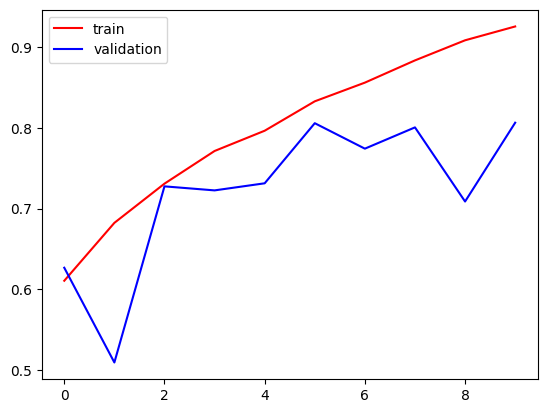

In [ ]:
# Visualization of the train and validation data based on accuracy

import matplotlib.pyplot as plt


plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


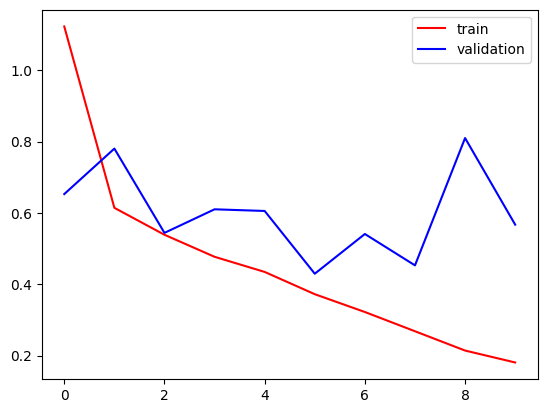

In [ ]:
# Visualization of the train and validation data based on loss

plt.plot(history1.history['loss'],color='red',label='train')
plt.plot(history1.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

As we can see by Above graphes that after applying some hyperparameter tuning/remedies the gap between train accuracy and validation accuracy as well as train loss and validation loss got bit reduced, although trining accuracy also got reduced.

In [ ]:
# To See the result we randomly take image try check the model prediction

In [ ]:
# To read the test image import opencv
import cv2
test_img_dog = cv2.imread('/content/images (1).jpg')

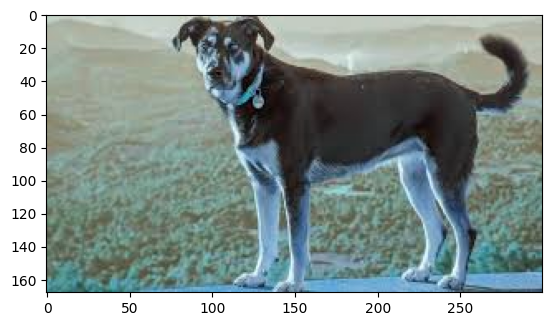

In [ ]:
plt.imshow(test_img_dog)

In [ ]:
test_img_dog.shape

(168, 300, 3)

In [ ]:
# Resizing the test image
test_img_dog = cv2.resize(test_img_dog,(256,256))

In [ ]:
test_img_dog.shape

(256, 256, 3)

In [ ]:
# Since we give data to our model into batches and here we have only one image so we convert our image into 4d tesnor with having (1,256,256,3) dimension values
test_input_dog = test_img_dog.reshape((1,256,256,3))

In [ ]:
model1.predict(test_input_dog)


1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

##As we know one of the fundamental and important Technique in Deep Learning called **Transfer Learning** a technique in which Knowledge learned from a task is re-used in order to boost performance on a related task.

**Transfer Learning by Using VGG16**

In [8]:
# For better result we can use Transfer Learning Technique
# For that here we are using VGG16(Visual Geometry Group 16) model
from keras.applications.vgg16 import VGG16


In [40]:
# VGG16 Convolutional Base Configuration
vgg16_base = VGG16(weights='imagenet',include_top=False,input_shape=(256,256,3)) # include_top = False means the top layer means dense layer in VGG class we are removing that layers


In [41]:
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [11]:
# Now we create our own model as per our requirement
model = Sequential()

model.add(vgg16_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 23103809 (88.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Since we are ready to retrain our model with some pretrained model (vgg16) so we will freeze the convolutional part of vgg16model to avoid retraining of already pre trained parameters
vgg16_base.trainable = False

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 8389121 (32.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [15]:
# Model Compilation
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [16]:
# Fitting the Model to the Dataset

history = model.fit(norm_train,epochs=10,validation_data=norm_val)

Epoch 1/10
625/625 [==============================] - 148s 219ms/step - loss: 0.2551 - accuracy: 0.9001 - val_loss: 0.1556 - val_accuracy: 0.9344
Epoch 2/10
625/625 [==============================] - 134s 214ms/step - loss: 0.1255 - accuracy: 0.9477 - val_loss: 0.1730 - val_accuracy: 0.9272
Epoch 3/10
625/625 [==============================] - 134s 213ms/step - loss: 0.0945 - accuracy: 0.9626 - val_loss: 0.1550 - val_accuracy: 0.9346
Epoch 4/10
625/625 [==============================] - 133s 212ms/step - loss: 0.0670 - accuracy: 0.9735 - val_loss: 0.1842 - val_accuracy: 0.9288
Epoch 5/10
625/625 [==============================] - 134s 213ms/step - loss: 0.0482 - accuracy: 0.9822 - val_loss: 0.1968 - val_accuracy: 0.9320
Epoch 6/10
625/625 [==============================] - 133s 213ms/step - loss: 0.0404 - accuracy: 0.9833 - val_loss: 0.2231 - val_accuracy: 0.9340
Epoch 7/10
625/625 [==============================] - 134s 213ms/step - loss: 0.0405 - accuracy: 0.9833 - val_loss: 0.3438 -

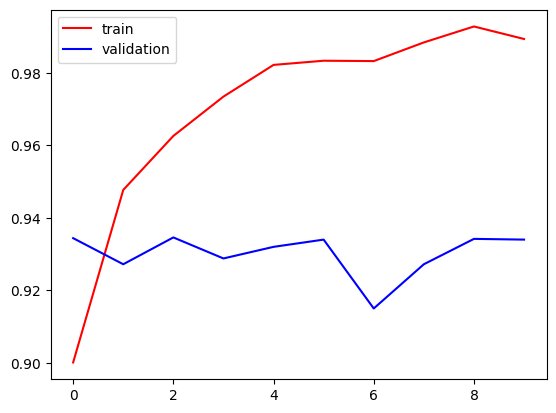

In [17]:
# Visualization of the train and validation data based on accuracy




plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


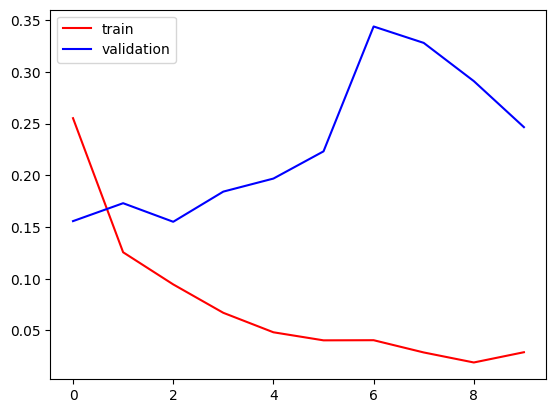

In [18]:
# Visualization of the train and validation data based on loss




plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# To See the result we randomly take image try check the model prediction

In [19]:
# To read the test image import opencv
import cv2
test_img_dog = cv2.imread('/content/images (1).jpg')

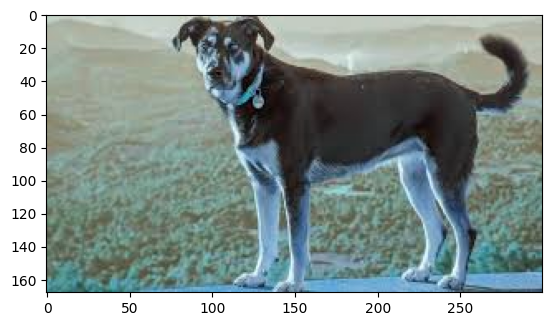

In [20]:
plt.imshow(test_img_dog)

In [21]:
test_img_dog.shape

(168, 300, 3)

In [22]:
# Resizing the test image
test_img_dog = cv2.resize(test_img_dog,(256,256))

In [23]:
test_img_dog.shape

(256, 256, 3)

In [24]:
# Since we give data to our model into batches and here we have only one image so we convert our image into 4d tesnor with having (1,256,256,3) dimension values
test_input_dog = test_img_dog.reshape((1,256,256,3))

In [25]:
model.predict(test_input_dog)


1/1 [==============================] - 1s 1s/step


array([[1.]], dtype=float32)

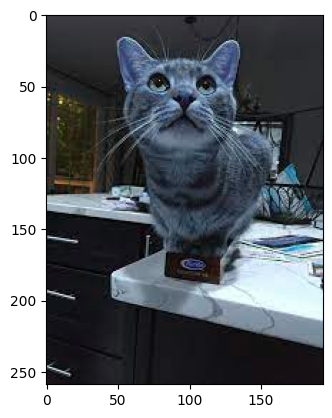

In [32]:
test_img_cat = cv2.imread('/content/download.jpg')
plt.imshow(test_img_cat)

In [33]:
test_img_cat.shape

(259, 194, 3)

In [34]:
# Resizing the test image
test_img_cat = cv2.resize(test_img_cat,(256,256))

In [35]:

test_img_cat.shape

(256, 256, 3)

In [36]:
# Since we give data to our model into batches and here we have only one image so we convert our image into 4d tesnor with having (1,256,256,3) dimension values
test_input_cat = test_img_cat.reshape((1,256,256,3))

In [37]:
model.predict(test_input_cat)


1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

**Let's Try Some Regularization Technique in Our Model.**

## Dropout Technique:

In [42]:
# Now we create our own model as per our requirement
model_with_Dropout = Sequential()

model_with_Dropout.add(vgg16_base)

model_with_Dropout.add(Flatten())

model_with_Dropout.add(Dense(256,activation = 'relu'))
# Dropout Layer
model_with_Dropout.add(Dropout(0.5))

model_with_Dropout.add(Dense(1,activation='sigmoid'))

In [43]:
model_with_Dropout.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 23103809 (88.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
# Since we are ready to retrain our model with some pretrained model (vgg16) so we will freeze the convolutional part of vgg16model
vgg16_base.trainable = False

In [45]:
model_with_Dropout.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 8389121 (32.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [46]:
# Model Compilation
model_with_Dropout.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [47]:
# Fitting the Model to the Dataset

history = model_with_Dropout.fit(norm_train,epochs=10,validation_data=norm_val)

Epoch 1/10
625/625 [==============================] - 152s 240ms/step - loss: 0.3876 - accuracy: 0.8727 - val_loss: 0.1725 - val_accuracy: 0.9320
Epoch 2/10
625/625 [==============================] - 149s 238ms/step - loss: 0.1966 - accuracy: 0.9192 - val_loss: 0.1550 - val_accuracy: 0.9372
Epoch 3/10
625/625 [==============================] - 137s 218ms/step - loss: 0.1805 - accuracy: 0.9247 - val_loss: 0.1866 - val_accuracy: 0.9216
Epoch 4/10
625/625 [==============================] - 151s 241ms/step - loss: 0.1670 - accuracy: 0.9322 - val_loss: 0.1506 - val_accuracy: 0.9372
Epoch 5/10
625/625 [==============================] - 150s 239ms/step - loss: 0.1473 - accuracy: 0.9358 - val_loss: 0.1524 - val_accuracy: 0.9332
Epoch 6/10
625/625 [==============================] - 135s 216ms/step - loss: 0.1291 - accuracy: 0.9465 - val_loss: 0.1548 - val_accuracy: 0.9336
Epoch 7/10
625/625 [==============================] - 134s 214ms/step - loss: 0.1200 - accuracy: 0.9500 - val_loss: 0.1509 -

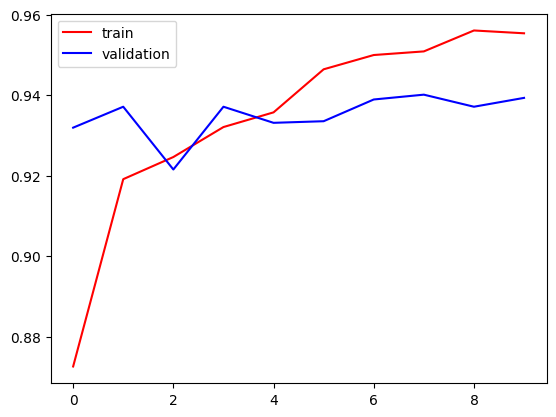

In [48]:
# Visualization of the train and validation data based on accuracy




plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


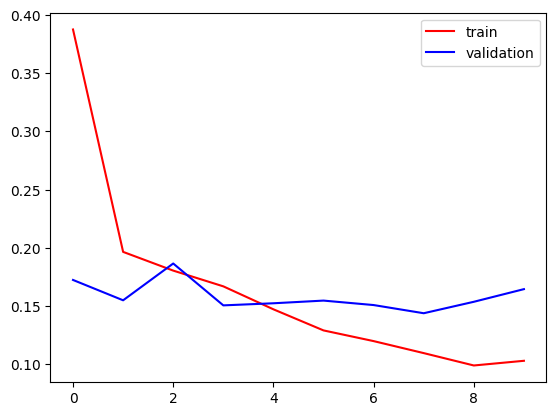

In [49]:
# Visualization of the train and validation data based on loss




plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# To See the result we randomly take image try check the model prediction

In [50]:
# To read the test image import opencv
import cv2
test_img_dog = cv2.imread('/content/images (1).jpg')

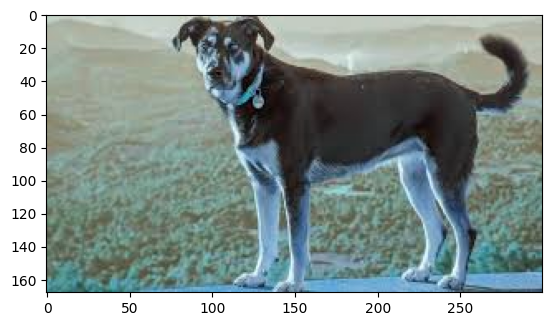

In [51]:
plt.imshow(test_img_dog)

In [52]:
test_img_dog.shape

(168, 300, 3)

In [53]:
# Resizing the test image
test_img_dog = cv2.resize(test_img_dog,(256,256))

In [54]:
test_img_dog.shape

(256, 256, 3)

In [55]:
# Since we give data to our model into batches and here we have only one image so we convert our image into 4d tesnor with having (1,256,256,3) dimension values
test_input_dog = test_img_dog.reshape((1,256,256,3))

In [56]:
model.predict(test_input_dog)


1/1 [==============================] - 0s 28ms/step


array([[1.]], dtype=float32)

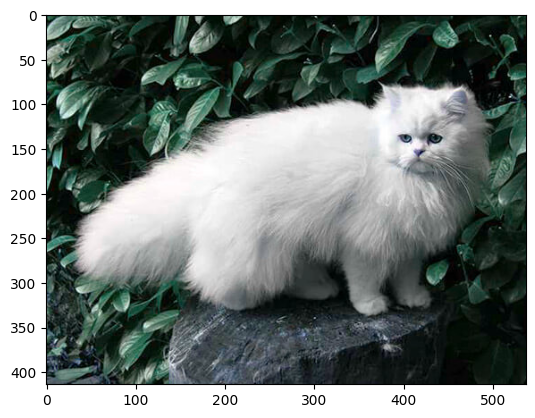

In [57]:
test_img_cat = cv2.imread('/content/persian-doll-face.jpg')
plt.imshow(test_img_cat)

In [58]:
test_img_cat.shape

(414, 537, 3)

In [59]:
# Resizing the test image
test_img_cat = cv2.resize(test_img_cat,(256,256))

In [60]:

test_img_cat.shape

(256, 256, 3)

In [62]:
# Since we give data to our model into batches and here we have only one image so we convert our image into 4d tesnor with having (1,256,256,3) dimension values
test_input_cat = test_img_cat.reshape((1,256,256,3))

In [63]:
model.predict(test_input_cat)


1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

## BatchNormalization, Dropout, Wieght Reguarization(L2) Technique:

In [64]:
# Importing l2 functionality from keras.regularizers modeule
from tensorflow.keras.regularizers import l2

In [65]:
# Now we create our own model as per our requirement
model = Sequential()

model.add(vgg16_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 8389121 (32.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [67]:
# Since we are ready to retrain our model with some pretrained model (vgg16) so we will freeze the convolutional part of vgg16model
vgg16_base.trainable = False

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 8389121 (32.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [69]:
# Model Compilation
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [70]:
# Fitting the Model to the Dataset

history = model.fit(norm_train,epochs=10,validation_data=norm_val)

Epoch 1/10
625/625 [==============================] - 151s 240ms/step - loss: 0.7704 - accuracy: 0.8289 - val_loss: 0.4078 - val_accuracy: 0.9178
Epoch 2/10
625/625 [==============================] - 149s 238ms/step - loss: 0.5054 - accuracy: 0.7799 - val_loss: 0.3314 - val_accuracy: 0.9188
Epoch 3/10
625/625 [==============================] - 135s 215ms/step - loss: 0.4808 - accuracy: 0.7853 - val_loss: 0.3711 - val_accuracy: 0.9146
Epoch 4/10
625/625 [==============================] - 148s 237ms/step - loss: 0.5124 - accuracy: 0.7757 - val_loss: 0.3481 - val_accuracy: 0.9136
Epoch 5/10
625/625 [==============================] - 135s 215ms/step - loss: 0.5244 - accuracy: 0.7692 - val_loss: 0.3033 - val_accuracy: 0.9200
Epoch 6/10
625/625 [==============================] - 135s 215ms/step - loss: 0.5388 - accuracy: 0.7264 - val_loss: 0.3274 - val_accuracy: 0.9076
Epoch 7/10
625/625 [==============================] - 149s 238ms/step - loss: 0.5476 - accuracy: 0.6852 - val_loss: 0.3491 -

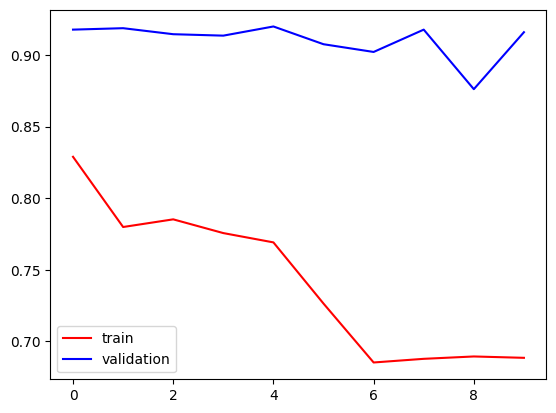

In [71]:
# Visualization of the train and validation data based on accuracy




plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


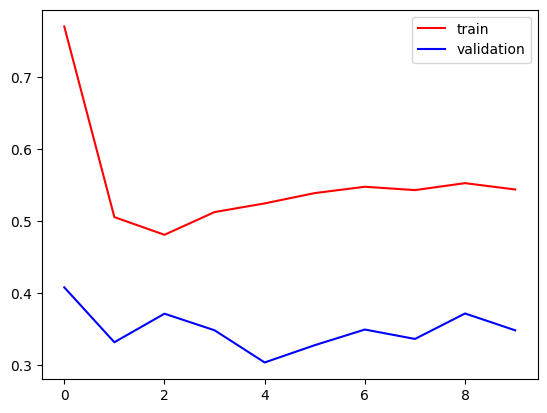

In [72]:
# Visualization of the train and validation data based on loss




plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## Data Augmentation Technique:

In [73]:
# VGG16 Convolutional Base Configuration
vgg16_base = VGG16(weights='imagenet',include_top=False,input_shape=(256,256,3)) # include_top = False means the top layer means dense layer in VGG class we are removing that layers


In [74]:
# Now we create our own model as per our requirement
model = Sequential()

model.add(vgg16_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               8388864   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 23103809 (88.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
# Since we are ready to retrain our model with some pretrained model (vgg16) so we will freeze the convolutional part of vgg16model
vgg16_base.trainable = False

In [77]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               8388864   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 8389121 (32.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [78]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [79]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [80]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [81]:
# Applying Data Augmentation on training Dataset
train_augmented = train_datagen.flow_from_directory('/content/train',
                                                    target_size = (256,256),
                                                    batch_size = batch_size,
                                                    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [82]:
test_augmented = train_datagen.flow_from_directory('/content/test',
                                                    target_size = (256,256),
                                                    batch_size = batch_size,
                                                    class_mode='binary')

Found 5000 images belonging to 2 classes.


In [83]:
# Model Compilation
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [85]:
# Fitting the Model to the Dataset

history = model.fit_generator(train_augmented,epochs=10,validation_data=test_augmented)

<ipython-input-85-e6679760da61>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_augmented,epochs=10,validation_data=test_augmented)


Epoch 1/10
625/625 [==============================] - 413s 660ms/step - loss: 0.2312 - accuracy: 0.9033 - val_loss: 0.1763 - val_accuracy: 0.9270
Epoch 2/10
625/625 [==============================] - 416s 666ms/step - loss: 0.1782 - accuracy: 0.9262 - val_loss: 0.1988 - val_accuracy: 0.9166
Epoch 3/10
625/625 [==============================] - 422s 675ms/step - loss: 0.1553 - accuracy: 0.9359 - val_loss: 0.1642 - val_accuracy: 0.9322
Epoch 4/10
625/625 [==============================] - 423s 677ms/step - loss: 0.1425 - accuracy: 0.9441 - val_loss: 0.1676 - val_accuracy: 0.9314
Epoch 5/10
625/625 [==============================] - 419s 670ms/step - loss: 0.1397 - accuracy: 0.9441 - val_loss: 0.1549 - val_accuracy: 0.9362
Epoch 6/10
625/625 [==============================] - 416s 665ms/step - loss: 0.1286 - accuracy: 0.9485 - val_loss: 0.1521 - val_accuracy: 0.9372
Epoch 7/10
625/625 [==============================] - 415s 664ms/step - loss: 0.1202 - accuracy: 0.9517 - val_loss: 0.1673 -

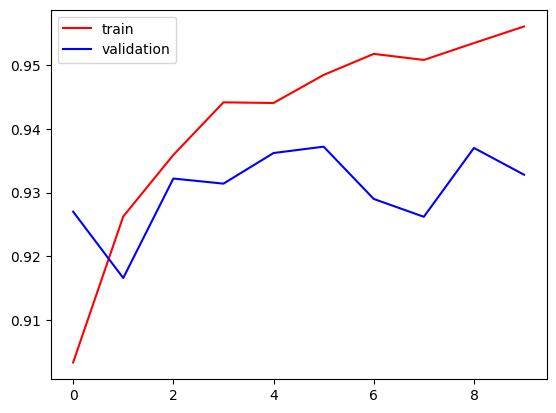

In [86]:
# Visualization of the train and validation data based on accuracy




plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


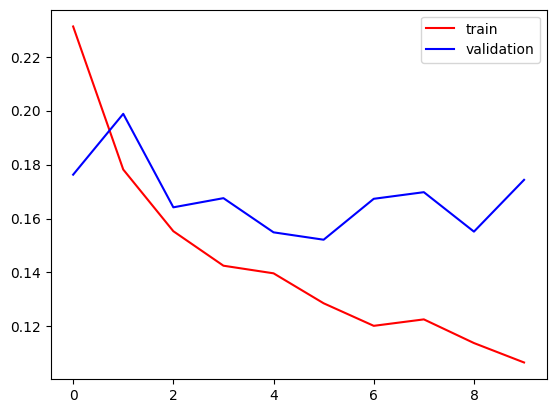

In [87]:
# Visualization of the train and validation data based on loss




plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [88]:
# To read the test image import opencv
import cv2
test_img_dog = cv2.imread('/content/images (1).jpg')

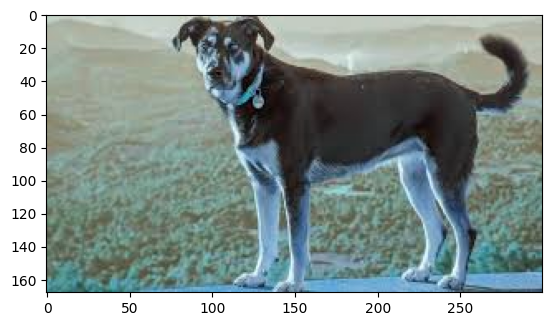

In [89]:
plt.imshow(test_img_dog)

In [90]:
test_img_dog.shape

(168, 300, 3)

In [91]:
# Resizing the test image
test_img_dog = cv2.resize(test_img_dog,(256,256))

In [92]:
test_img_dog.shape

(256, 256, 3)

In [93]:
# Since we give data to our model into batches and here we have only one image so we convert our image into 4d tesnor with having (1,256,256,3) dimension values
test_input_dog = test_img_dog.reshape((1,256,256,3))

In [94]:
model.predict(test_input_dog)


1/1 [==============================] - 0s 135ms/step


array([[1.]], dtype=float32)

In [95]:
test_img_cat = cv2.imread('/content/download.jpg')
plt.imshow(test_img_cat)

In [ ]:
test_img_cat.shape

In [ ]:
# Resizing the test image
test_img_cat = cv2.resize(test_img_cat,(256,256))

In [ ]:

test_img_cat.shape

In [ ]:
# Since we give data to our model into batches and here we have only one image so we convert our image into 4d tesnor with having (1,256,256,3) dimension values
test_input_cat = test_img_cat.reshape((1,256,256,3))

In [ ]:
model.predict(test_input_cat)


1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)